In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
iris = datasets.load_iris() #Loading the dataset

In [3]:
# Convert dataset to Dataframe
df = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )
df

# From the dataset, we realize that for target variable.
# 0: 'Setosa'
# 1: 'versicolor'
# 2: 'virginica'

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [4]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [5]:
classes = df.groupby('target').size()
classes

target
0.0    50
1.0    50
2.0    50
dtype: int64

We can observe that no variables (features and target) with NaN values are presented. Additionally, the target values
are balanced. Thus, only will be needed feature scalling.

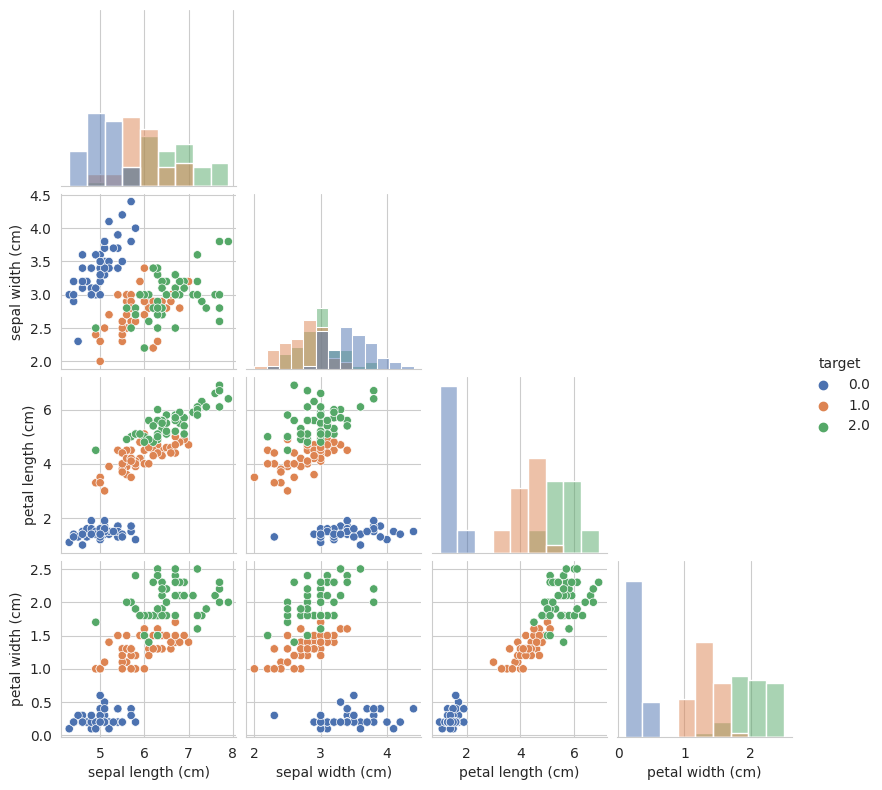

In [6]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.pairplot(df, hue='target', diag_kind="hist", dropna=True, vars=df.columns[:-1],
             height=2, corner=True, palette="deep")

We can observe that only the variables petal length and width are linearly correlationed. That means PCA could be applied

In [7]:
# Select independent and target variables
y = df[['target']].astype(int)
X = df.drop(y, axis=1)

# Split the training sample (70%) from test sample (30%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
gpu_params = {'device': 'cuda',
		      'tree_method': 'hist',
              }

# Create an XGBoost classifier
clf = xgb.XGBClassifier(objective='multi:softmax',
                        num_class=len(classes),
                        random_state=42,
                        **gpu_params,
                        )

param_grid = {'n_estimators': [50, 100, 150, 200],
              'learning_rate': [0.02, 0.04, 0.06, 0.08, 0.1],
              'max_depth': [4, 6, 8, 10],
              }

# GridSearch for hyperparam tunning and Cross Validation
search = GridSearchCV(estimator=clf,
                      param_grid=param_grid,
                      scoring="accuracy",
                      cv=5,        # number of crossVal folds.
                      n_jobs=-1)   # Using all cores for processing

# Fit the model evaluating the grid of params
search.fit(X_train, y_train.values.ravel())

[10:21:01] WARNING: ../src/learner.cc:767: 
Parameters: { "device" } are not used.

[10:21:01] WARNING: ../src/learner.cc:767: 
Parameters: { "device" } are not used.

[10:21:01] WARNING: ../src/learner.cc:767: 
Parameters: { "device" } are not used.

[10:21:01] WARNING: ../src/learner.cc:767: 
Parameters: { "device" } are not used.

[10:21:01] WARNING: ../src/learner.cc:767: 
Parameters: { "device" } are not used.

[10:21:02] WARNING: ../src/learner.cc:767: 
Parameters: { "device" } are not used.

[10:21:02] WARNING: ../src/learner.cc:767: 
Parameters: { "device" } are not used.

[10:21:02] WARNING: ../src/learner.cc:767: 
Parameters: { "device" } are not used.

[10:21:02] WARNING: ../src/learner.cc:767: 
Parameters: { "device" } are not used.

[10:21:02] WARNING: ../src/learner.cc:767: 
Parameters: { "device" } are not used.

[10:21:02] WARNING: ../src/learner.cc:767: 
Parameters: { "device" } are not used.

[10:21:02] WARNING: ../src/learner.cc:767: 
Parameters: { "device" } are not

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device='cuda',
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learn...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.02, 0.04, 0.06, 0.08, 0.1],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [19]:
# params for XGBoost before hyperparam tunning (some of them were modified: objective, num_classes and gpu_params)
clf.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)>

In [20]:
print(f'best params: {search.best_params_}')
print(f'best score: {round(search.best_score_*100, 2)}%')

cv_GridScore_mean = round( search.cv_results_["mean_test_score"].mean()*100 , 2)
cv_GridScore_std  = round( search.cv_results_["std_test_score"].mean()*100 , 2)

print(f'mean score: ({cv_GridScore_mean} +- {cv_GridScore_std})%')

best params: {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 50}
best score: 92.38%
mean score: (92.19 +- 3.91)%


Remember that the mean score in the upper box corresponds to that of the grid, not for the best model.

In [21]:
# Picking the best estimator
clf_best = search.best_estimator_

In [23]:
from sklearn.model_selection import cross_val_score

# The cross validation is applied on the training sample.
cv_score = cross_val_score(estimator=clf_best,
                           X=X_train, y=y_train.values.ravel(), cv=5, n_jobs=-1)

cv_score_mean = round( cv_score.mean()*100, 2 )
cv_score_std  = round( cv_score.std()*100, 2 )

print(f'({cv_score_mean} +- {cv_score_std})%')

(92.38 +- 4.86)%


In [35]:
y_pred = clf_best.predict(X_test)

In [36]:
y_ = y_test.copy()
y_['target_pred'] = y_pred
y_

,target,target_pred
76,1,1
113,2,2
147,2,2
64,1,1
17,0,0
18,0,0
47,0,0
116,2,2
51,1,1
2,0,0


In [37]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)  # accuracy on the test sample
accuracy

0.9777777777777777

In [38]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

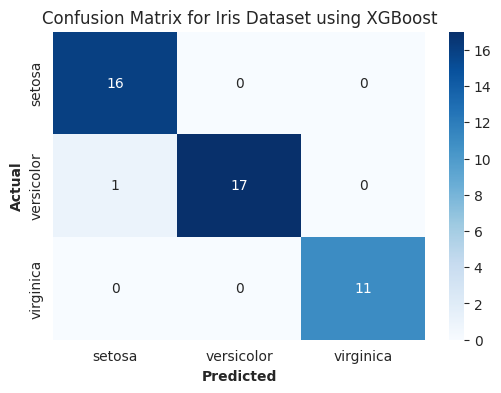

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.title('Confusion Matrix for Iris Dataset using XGBoost')
plt.show()